In [2]:
import pandas as pd
import numpy as np

In [3]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [4]:
df = df._get_numeric_data()

In [41]:
y = df['price']
x = df.drop(['price'], axis=1)
x.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [7]:
x_train.shape, y_train.shape

((180, 20), (180,))

In [8]:
x_test.shape, y_test.shape

((21, 20), (21,))

In [9]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train[['horsepower']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lr.score(x_test[['horsepower']], y_test)

0.7340722810055448

In [11]:
lr.score(x_train[['horsepower']], y_train)

0.6479796296498318

In [12]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lr, x[['horsepower']], y, cv=3)
np.mean(Rcross)

0.5033472663985092

In [13]:
scores = cross_val_score(lr, x[['horsepower']], y, cv=3)
print("R2-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

R2-Score: 0.50 (+/- 0.42)


In [15]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(lr, x[['horsepower']], y, cv=3)
print ("CV R^2-Score: {}".format(r2_score(y, predictions)))

CV R^2-Score: 0.620886792954999


In [16]:
for i in range(2,10):
    
    scores = cross_val_score(lr, x[['horsepower']], y, cv=i)
    predictions = cross_val_predict(lr, x[['horsepower']], y, cv=i)
    print("(%0.2f, %0.2f)" % (scores.mean(), r2_score(y, predictions)))

(0.52, 0.55)
(0.50, 0.62)
(0.52, 0.63)
(0.39, 0.61)
(0.01, 0.63)
(0.28, 0.62)
(0.04, 0.61)
(0.15, 0.63)


In [17]:
lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
yhat=lr.predict(x_train[['horsepower']])

In [19]:
import seaborn as sns

ax1 = sns.distplot(y_train, hist=False, color="r", label='train')
ax2 = sns.distplot(yhat, hist=False, color="b", label='trainHat', ax=ax1)

In [20]:
lr2 = LinearRegression()
lr2.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat=lr2.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

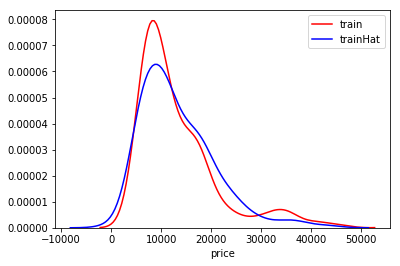

In [21]:
ax1=sns.distplot(y_train, hist=False, color="r", label='train')
ax2=sns.distplot(yhat, hist=False, color="b", label='trainHat', ax=ax1)

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
x_pr = pr.fit_transform(np.array([[1, 2],[2, 3], [4, 5]]))
x_pr

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)

In [24]:
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train[['horsepower']])
x_test_poly = poly.fit_transform(x_test[['horsepower']])

lre2 = LinearRegression()
lre2.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

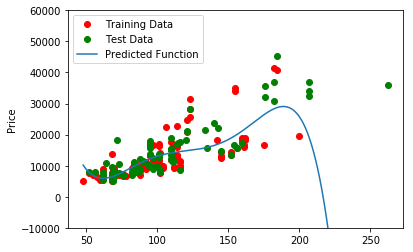

In [25]:
import matplotlib.pyplot as plt

plt.plot(x_train[['horsepower']], y_train, 'ro', label='Training Data')
plt.plot(x_test[['horsepower']], y_test, 'go', label='Test Data')

xmax=max([x_train[['horsepower']].values.max(), x_test[['horsepower']].values.max()])
xmin=min([x_train[['horsepower']].values.min(), x_test[['horsepower']].values.min()])
x=np.arange(xmin, xmax, 0.1)

plt.plot(x, lre2.predict(poly.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
plt.ylim([-10000, 60000])
plt.ylabel('Price')
plt.legend()

In [26]:
lre2.score(x_train_poly, y_train)

0.5567716899817778

In [27]:
lre2.score(x_test_poly, y_test)

-29.871838229908324

Text(0,0.5,'score')

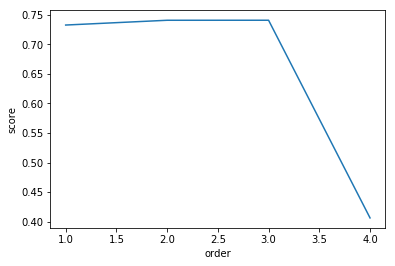

In [28]:
score_vector = []

order = [1, 2, 3, 4]
for n in order:
    poly = PolynomialFeatures(degree=n)
    x_train_poly = poly.fit_transform(x_train[['horsepower']])
    x_test_poly  = poly.fit_transform(x_test[['horsepower']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    score_vector.append(lr.score(x_test_poly, y_test))

plt.plot(order, score_vector)
plt.xlabel('order')
plt.ylabel('score')

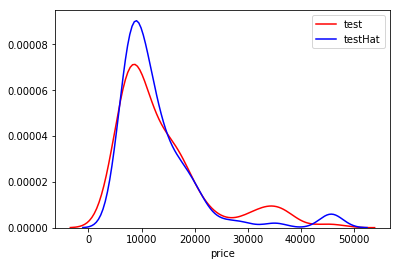

In [29]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_poly = poly.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

YtestHat = lr.predict(x_test_poly)

ax1 = sns.distplot(y_test, hist=False, color="r", label="test")
ax2 = sns.distplot(YtestHat, hist=False, color="b", label="testHat", ax=ax1)


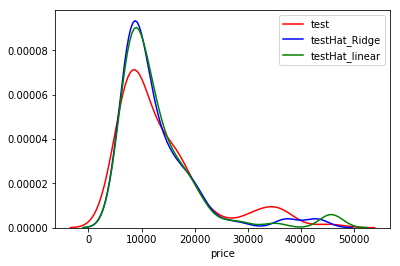

In [34]:
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_poly = poly.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

RigeModel=Ridge(alpha=1000)
RigeModel.fit(x_train_poly, y_train)

YtestHat = RigeModel.predict(x_test_poly)

ax1 = sns.distplot(y_test, hist=False, color="r", label="test")
ax2 = sns.distplot(YtestHat, hist=False, color="b", label="testHat_Ridge", ax=ax1)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)
YtestHat = lr.predict(x_test_poly)

ax3 = sns.distplot(YtestHat, hist=False, color="g", label="testHat_linear", ax=ax1)

In [44]:
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR = Ridge()
Grid = GridSearchCV(RR, parameters1, cv=4)
Grid.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)
BestRR = Grid.best_estimator_
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [46]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y)
BestRR2 = Grid2.best_estimator_
BestRR2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.840859719294301